Best Solution: [4 0 4 2 2 3 3 0 1 2]
Fitness: 0.051174931311115494


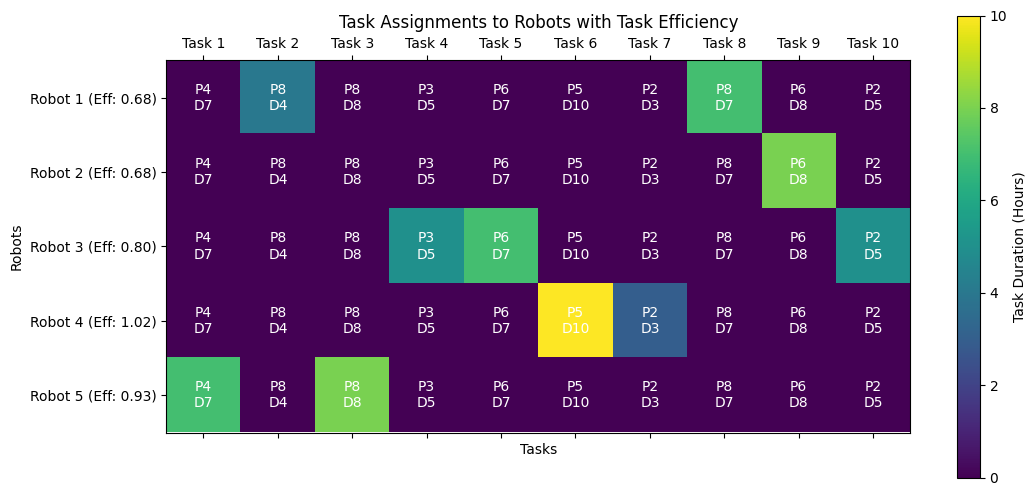

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Data Preparation
def generate_mock_data(num_tasks=10, num_robots=5):
    np.random.seed(42)
    task_durations = np.random.randint(1, 11, size=num_tasks)
    task_priorities = np.random.randint(1, 11, size=num_tasks)
    robot_efficiencies = np.random.uniform(0.5, 1.5, size=num_robots)
    return task_durations, task_priorities, robot_efficiencies

# Fitness Function
def calculate_fitness(individual, task_durations, robot_efficiencies):
    robot_times = np.zeros(len(robot_efficiencies))
    for i, robot_idx in enumerate(individual):
        robot_times[robot_idx] += task_durations[i] / robot_efficiencies[robot_idx]
    T_total = max(robot_times)
    B = np.std(robot_times)
    return 1 / (T_total + B + 1e-6)

# Genetic Operations
def tournament_selection(population, fitness_scores, tournament_size=3):
    participants = np.random.choice(np.arange(len(population)), size=tournament_size, replace=False)
    participants_fitness = np.array(fitness_scores)[participants]
    winner_index = participants[np.argmax(participants_fitness)]
    return population[winner_index]

def single_point_crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1))
    offspring1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
    offspring2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
    return offspring1, offspring2

def mutate(individual, mutation_rate=0.1):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            swap_with = np.random.randint(0, len(individual))
            individual[i], individual[swap_with] = individual[swap_with], individual[i]
    return individual

# Main GA Function
def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies, population_size=50, n_generations=100):
    num_tasks = len(task_durations)
    num_robots = len(robot_efficiencies)
    population = [np.random.randint(0, num_robots, size=num_tasks) for _ in range(population_size)]
    
    for _ in range(n_generations):
        fitness_scores = [calculate_fitness(individual, task_durations, robot_efficiencies) for individual in population]
        new_population = []
        for _ in range(population_size // 2):
            parent1 = tournament_selection(population, fitness_scores)
            parent2 = tournament_selection(population, fitness_scores)
            offspring1, offspring2 = single_point_crossover(parent1, parent2)
            offspring1 = mutate(offspring1)
            offspring2 = mutate(offspring2)
            new_population.extend([offspring1, offspring2])
        population = new_population
    
    best_index = np.argmax(fitness_scores)
    return population[best_index], fitness_scores[best_index]

# Updated Visualization Function
def updated_visualize_assignments(best_solution, task_durations, task_priorities, robot_efficiencies):
    num_robots = len(robot_efficiencies)
    num_tasks = len(task_durations)
    assignment_grid = np.zeros((num_robots, num_tasks))
    
    for task_idx, robot_idx in enumerate(best_solution):
        assignment_grid[robot_idx, task_idx] = task_durations[task_idx]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    cax = ax.matshow(assignment_grid, cmap='viridis')
    
    # Create the color bar for task durations
    cbar = fig.colorbar(cax, ax=ax)
    cbar.ax.set_ylabel('Task Duration (Hours)')
    
    # Add annotations for task priority and efficiency
    for i in range(num_tasks):
        for j in range(num_robots):
            ax.text(i, j, f"P{task_priorities[i]}\nD{task_durations[i]}", ha='center', va='center', color='white')






    # Set the ticks and labels
    ax.set_xticks(range(num_tasks))
    ax.set_yticks(range(num_robots))
    ax.set_xticklabels([f'Task {i+1}' for i in range(num_tasks)])
    ax.set_yticklabels([f'Robot {i+1} (Eff: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])
    ax.set_xlabel('Tasks')
    ax.set_ylabel('Robots')
    ax.set_title('Task Assignments to Robots with Task Efficiency')
    
    # Show the plot
    plt.show()

# Example Execution
if __name__ == "__main__":
    task_durations, task_priorities, robot_efficiencies = generate_mock_data()
    best_solution, best_fitness = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies)
    print(f"Best Solution: {best_solution}\nFitness: {best_fitness}")
    updated_visualize_assignments(best_solution, task_durations, task_priorities, robot_efficiencies)
